In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import datetime
from scipy import stats
import numpy as np
import pandas as pd

import notebook_utils
    
%matplotlib inline

coin = "btc_usd"
df = notebook_utils.load_time_bars_df(coin, exchange_name="bitmex")
df

,level_0,symbol,open_date,close_date,close,high,low,volume_usd,volume_coin,num_trades_in_bar,pct_change,price_change,short_price_change
index,,,,,,,,,,,,,
2016-01-01 00:06:00+00:00,2016-01-01 00:00:00+00:00,btc_usd,2016-01-01 00:06:00+00:00,2016-01-02 00:00:00+00:00,435.99,436.70,426.37,8.969094e+05,2.070698e+03,757.0,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,2016-01-02 00:00:00+00:00,btc_usd,2016-01-02 00:00:00+00:00,2016-01-03 00:00:00+00:00,435.00,438.00,429.25,1.368007e+06,3.159068e+03,695.0,-0.002271,0.997729,1.002271
2016-01-03 00:00:00+00:00,2016-01-03 00:00:00+00:00,btc_usd,2016-01-03 00:00:00+00:00,2016-01-04 00:00:00+00:00,429.79,435.40,422.14,2.240951e+06,5.224797e+03,1133.0,-0.011977,0.988023,1.011977
2016-01-04 00:00:00+00:00,2016-01-04 00:00:00+00:00,btc_usd,2016-01-04 00:00:00+00:00,2016-01-05 00:00:00+00:00,432.30,436.44,427.50,1.492213e+06,3.450867e+03,848.0,0.005840,1.005840,0.994160
2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,btc_usd,2016-01-05 00:00:00+00:00,2016-01-06 00:00:00+00:00,432.57,434.97,429.00,8.971873e+05,2.076792e+03,873.0,0.000625,1.000625,0.999375
2016-01-06 00:00:00+00:00,2016-01-06 00:00:00+00:00,btc_usd,2016-01-06 00:00:00+00:00,2016-01-07 00:00:00+00:00,428.72,432.20,425.01,1.025789e+06,2.386996e+03,699.0,-0.008900,0.991100,1.008900
2016-01-07 00:00:00+00:00,2016-01-07 00:00:00+00:00,btc_usd,2016-01-07 00:00:00+00:00,2016-01-08 00:00:00+00:00,461.02,464.04,426.12,6.958440e+06,1.542522e+04,4200.0,0.075341,1.075341,0.924659
2016-01-08 00:00:00+00:00,2016-01-08 00:00:00+00:00,btc_usd,2016-01-08 00:00:00+00:00,2016-01-09 00:00:00+00:00,453.53,469.49,445.42,6.182145e+06,1.355745e+04,4139.0,-0.016247,0.983753,1.016247
2016-01-09 00:00:00+00:00,2016-01-09 00:00:00+00:00,btc_usd,2016-01-09 00:00:00+00:00,2016-01-10 00:00:00+00:00,450.00,454.81,444.86,3.262375e+06,7.244277e+03,2572.0,-0.007783,0.992217,1.007783


In [2]:
start_date = '2017-01-01'
end_date = '2019-05-01'
analysis_options = dict(
    start_date=start_date,
    end_date=end_date,
    bars_per_day=1,
    extra_columns=[
        dict(name="mean",graph="price",style="C1"),
    ],
)

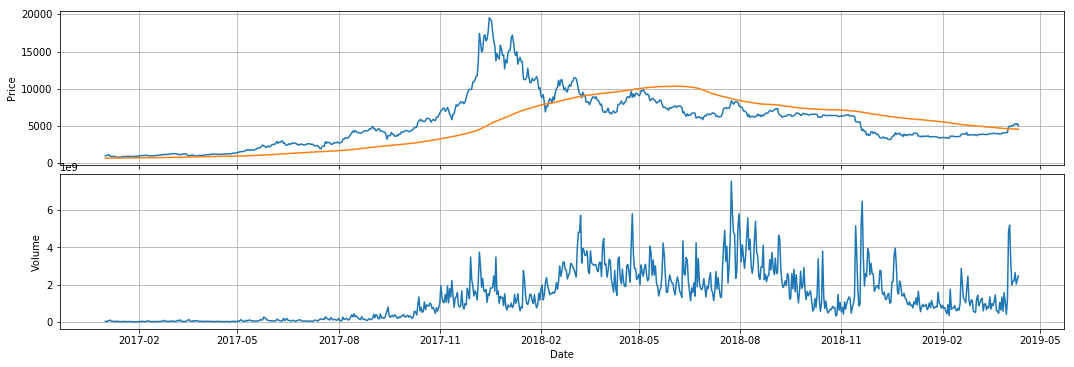

In [3]:
df["mean"] = df['close'].rolling(200).mean()

graph_df = df[(df.index >= start_date) & (df.index <= end_date)]

ga = notebook_utils.GraphAssistant(10)

ga.new_plot()
plt.plot(graph_df["close"])
plt.plot(graph_df["mean"])
plt.ylabel('Price')

ga.new_plot()
plt.plot(graph_df["volume_usd"])
plt.ylabel('Volume')

ga.show()

In [4]:
def future_info_signal(df):
    df["strat_signal"] = np.sign(df["pct_change"].shift(-1))
    return df

def mean_crossover_signal(df, mean_days=7):
    df["mean"] = df['close'].rolling(mean_days).mean()
    df["strat_signal"] = np.sign(df["close"] - df["mean"])
    return df

/Users/alexei/git/temple-capital/notebook_utils.py:60: RuntimeWarning: invalid value encountered in absolute
  df[f'strat_is_correct'] = np.where(np.sign(df['strat_signal'].shift(1)) == np.sign(df['pct_change']), 1, 0)
/Users/alexei/git/temple-capital/notebook_utils.py:134: RuntimeWarning: invalid value encountered in absolute
  plt.plot(cum_rets_after_fees, f"C{i}--", alpha=0.5)


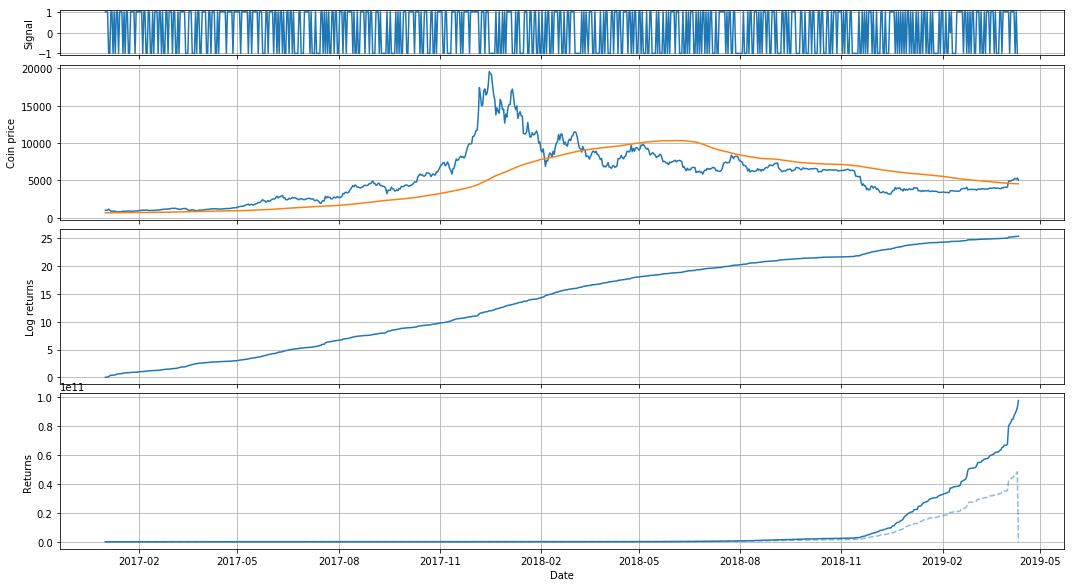

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[]
	Returns: 97420291801.26366
	Returns after fees: 50794611520.83408
	SR: 17.35423878475103
	SR (after fees): -0.03138168316278187
	% bars right: 1.0
	% bars in market: 0.9975932611311673
	Bars count: 831


/Users/alexei/git/temple-capital/notebook_utils.py:197: RuntimeWarning: invalid value encountered in absolute
  


In [11]:
simulation_result = notebook_utils.simulate(future_info_signal, df)
analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)

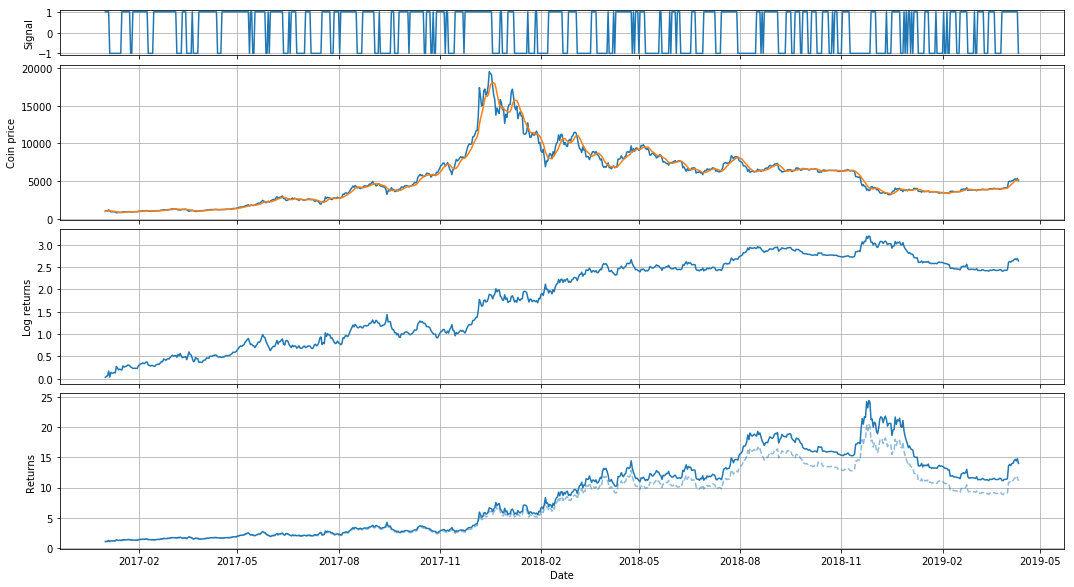

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[7]
	Returns: 14.008098729609193
	Returns after fees: 11.101146729296104
	SR: 1.2850578825763406
	SR (after fees): 1.1622444810197208
	% bars right: 0.5186522262334536
	% bars in market: 1.0
	Bars count: 831


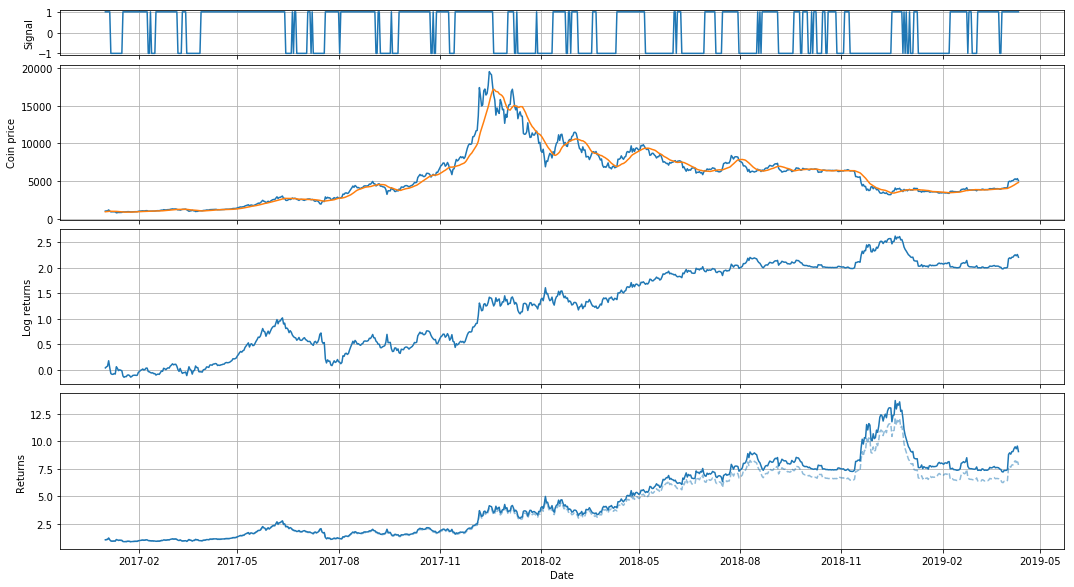

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[14]
	Returns: 9.055063543824085
	Returns after fees: 7.840244984017178
	SR: 1.065804973608264
	SR (after fees): 0.9903052488400856
	% bars right: 0.5379061371841155
	% bars in market: 1.0
	Bars count: 831


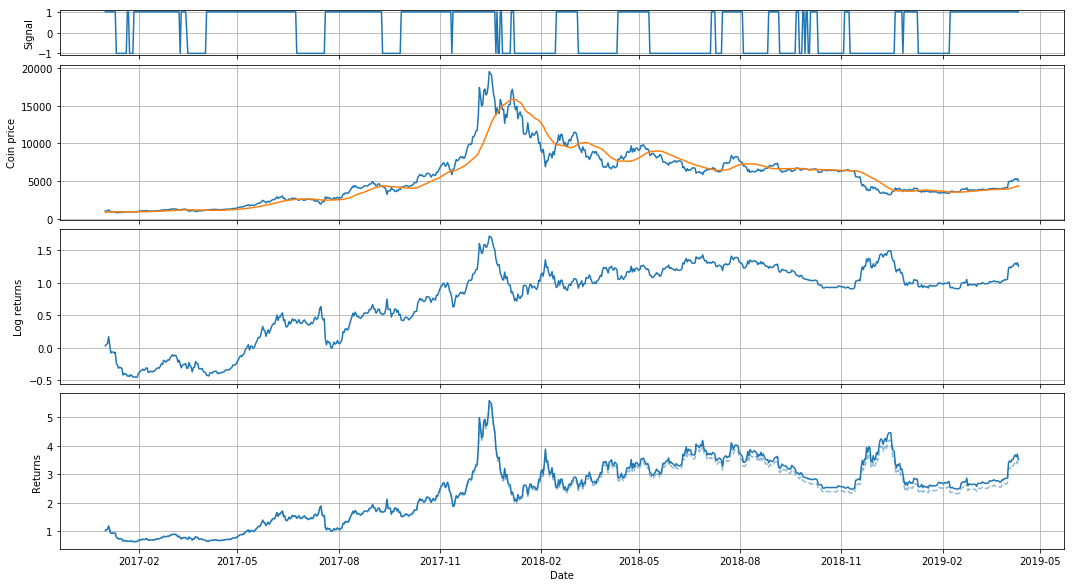

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[30]
	Returns: 3.516235186310025
	Returns after fees: 3.281711154956029
	SR: 0.5938260052991693
	SR (after fees): 0.5582207289873878
	% bars right: 0.536144578313253
	% bars in market: 0.9987966305655837
	Bars count: 831


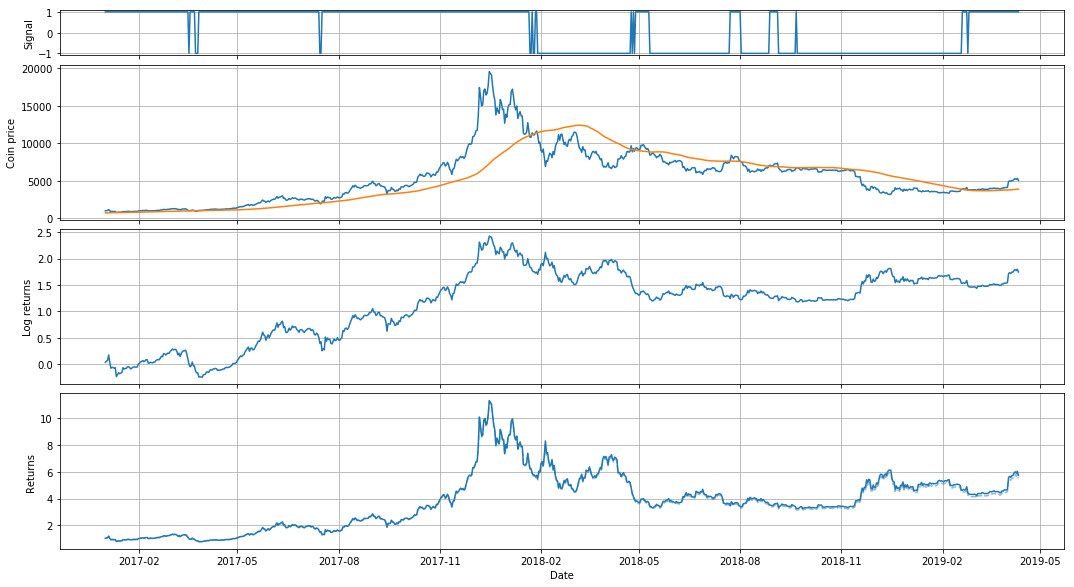

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[100]
	Returns: 5.722922305626551
	Returns after fees: 5.503944049784702
	SR: 0.8358723590277147
	SR (after fees): 0.8155758402195645
	% bars right: 0.5379061371841155
	% bars in market: 1.0
	Bars count: 831


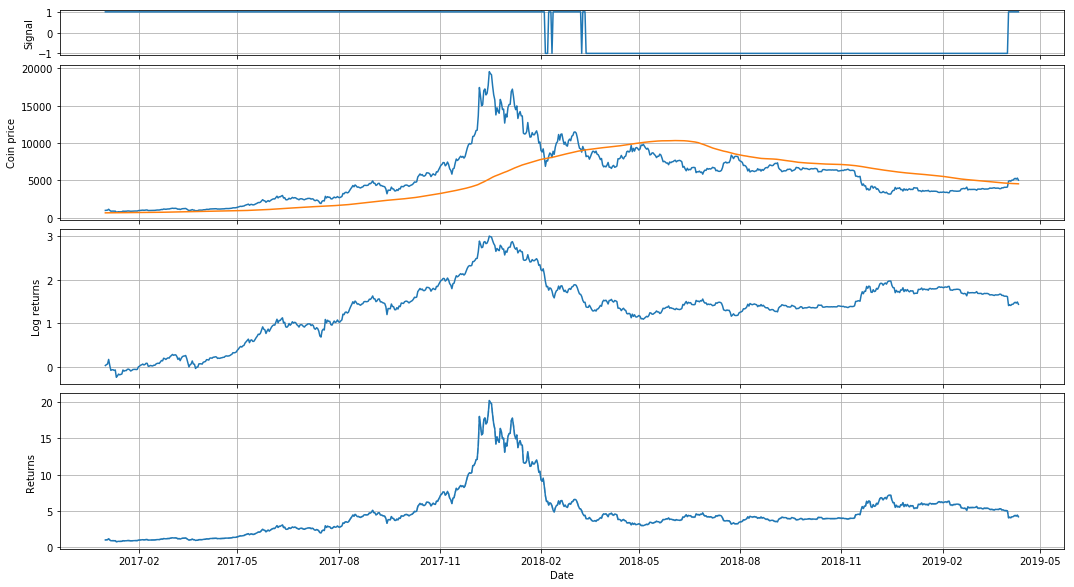

DF filtered 2017-01-01 00:00:00+00:00 to 2019-04-11 00:00:00+00:00
#[200]
	Returns: 4.217031546920882
	Returns after fees: 4.1667108241375965
	SR: 0.6832227257546575
	SR (after fees): 0.6769675957656375
	% bars right: 0.5379061371841155
	% bars in market: 1.0
	Bars count: 831


In [10]:
import importlib
importlib.reload(notebook_utils)
for mean_days in [7,14,30,100,200]:
    simulation_result = notebook_utils.simulate(mean_crossover_signal, df, mean_days)
    analysis_result = notebook_utils.graph_print_analyze_simulation_result(simulation_result, analysis_options)